In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [47]:
os.getcwd()

'F:\\New folder\\Batch 67 Day 12'

In [48]:
os.chdir('F:\\New folder\\Batch 67 Day 12\\')

In [49]:
os.getcwd()

'F:\\New folder\\Batch 67 Day 12'

In [50]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0
...,...,...,...,...,...
395,10220446,Female,20,141231,1
396,12387292,Male,50,75848,1
397,10715173,Female,25,82560,1
398,10016842,Male,55,147667,0


In [51]:
df=df.drop(['User ID'],axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,42,121315,0
1,Male,53,67214,0
2,Female,59,111005,0
3,Female,39,53414,0
4,Male,39,114285,0
...,...,...,...,...
395,Female,20,141231,1
396,Male,50,75848,1
397,Female,25,82560,1
398,Male,55,147667,0


In [52]:
x=df.iloc[:,1:3]
x

,Age,EstimatedSalary
0,42,121315
1,53,67214
2,59,111005
3,39,53414
4,39,114285
...,...,...
395,20,141231
396,50,75848
397,25,82560
398,55,147667


In [53]:
y=df.iloc[:,3]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [54]:
x[y==0].Age

0      42
1      53
2      59
3      39
4      39
       ..
377    43
380    35
387    34
394    41
398    55
Name: Age, Length: 257, dtype: int64

In [55]:
x[y==0].EstimatedSalary

0      121315
1       67214
2      111005
3       53414
4      114285
        ...  
377    121151
380     88727
387    140775
394    107820
398    147667
Name: EstimatedSalary, Length: 257, dtype: int64

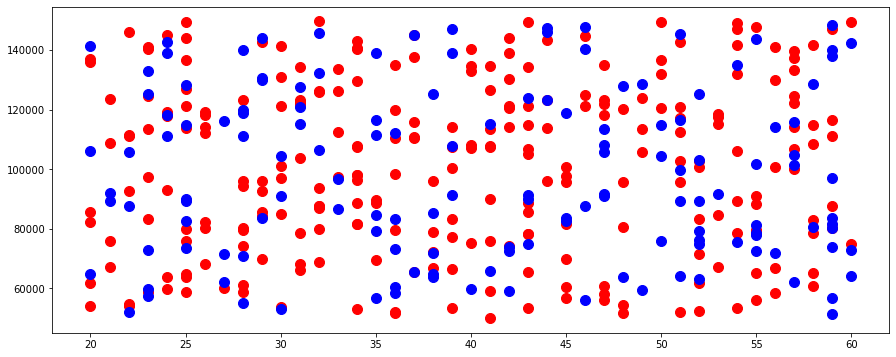

In [56]:
plt.scatter(x[y==0].Age,x[y==0].EstimatedSalary,s=100,c='r')
plt.scatter(x[y==1].Age,x[y==1].EstimatedSalary,s=100,c='b')

In [57]:
# The window size is very small , if I want to diaplay in a bigger size , I can use figsixe command
from matplotlib.pylab import rcParams

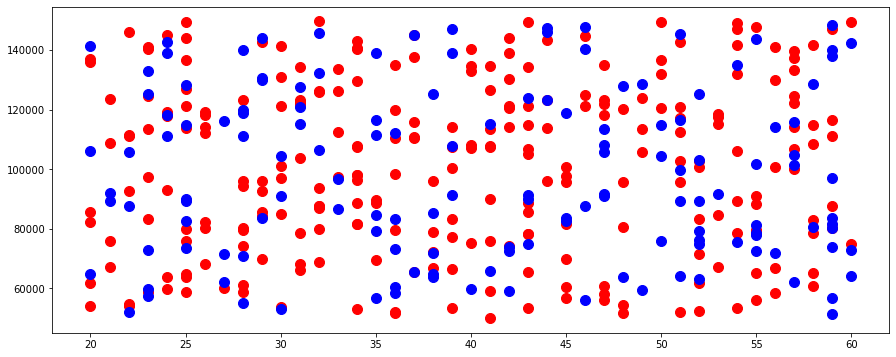

In [58]:
rcParams['figure.figsize']=15,6
plt.scatter(x[y==0].Age,x[y==0].EstimatedSalary,s=100,c='r')
plt.scatter(x[y==1].Age,x[y==1].EstimatedSalary,s=100,c='b')

In [61]:
# Now we have value of x and y
x

,Age,EstimatedSalary
0,42,121315
1,53,67214
2,59,111005
3,39,53414
4,39,114285
...,...,...
395,20,141231
396,50,75848
397,25,82560
398,55,147667


In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [63]:
# since it is a classification problem applying the logistic regression first but before that apply standardization to our independent variable x


In [66]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
print(x)

[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [68]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [70]:
log_pred=log.predict(x_test)
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
# to check the accuracy import classification report, conusion matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm=confusion_matrix(y_test,log_pred)
print(cm)

[[56  0]
 [24  0]]


In [77]:
# to check the accuracy
56+24

80

In [78]:
56/80

0.7